## Residence Charge Estimator 2022
### Problem Statement
- Lots of people migartes to new cities to make there professional and educational career and want to have residence not far away from there workplace and college.This Model will help them to figured out rent based on Locality they wants to acquire,model includes major cities like Chennai, Mumbai, Delhi, Hyderabad, Kolkata and Bangalore.

- When i was on college i have also faced this issue while hunting residence and due to lack of information of that particular area resulted me to pay ₹ 1500 extra for the property which we have acquired for rent. 

### Project Overview
- Designed a Machine Learning Regression Model which is focused on charge of residence

- Main aim of this estimator is to display residence charge based on Bathroom / House / Kitchen, Square Feet , Bathroom, Area type, Furnishing status, Floor and Owner prefference of given City and Locality. 

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
data = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,5/13/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,5/16/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,7/4/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,5/9/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
data.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,5/18/2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,5/15/2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,7/10/2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,7/6/2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,5/4/2022,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [8]:
# splitting floor and maximum floors
# data['Floor'].str.split(' ', expand = True)

In [9]:
data[['floor','1','2','max floor','4']] = data['Floor'].str.split(' ', expand = True)

In [10]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'floor', '1', '2', 'max floor', '4'],
      dtype='object')

In [11]:
# Removing Unwanted Columns
data.drop(['Posted On','Floor','Point of Contact','1', '2','4','max floor'], axis = 1, inplace = True)

In [12]:
data.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,floor
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Ground
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,1
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,1
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,1
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,1


In [13]:
data['floor'].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper', '11',
       'Lower', '6', '14', '43', '13', '18', '17', '9', '19', '60', '34',
       '12', '26', '25', '53', '16', '10', '39', '32', '47', '28', '20',
       '15', '65', '40', '37', '22', '21', '30', '35', '33', '44', '41',
       '46', '27', '45', '48', '50', '24', '23', '29', '49', '36', '76'],
      dtype=object)

In [14]:
data.floor.replace({'Ground': 0, 'Upper': 0.75, 'Lower': 0.50}, inplace = True)
data['Tenant Preferred'].replace({'Bachelors/Family' : 'Both'}, inplace = True)

In [15]:
data.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
floor                0
dtype: int64

In [16]:
data['floor'] = data['floor'].astype(int) 
data.reset_index(drop = True)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,floor
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Both,2,0
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Both,1,1
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Both,1,1
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Both,1,1
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,1
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Both,2,3
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Both,3,1
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Both,3,3
4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,23


In [17]:
data.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
floor                0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Area Type          4746 non-null   object
 4   Area Locality      4746 non-null   object
 5   City               4746 non-null   object
 6   Furnishing Status  4746 non-null   object
 7   Tenant Preferred   4746 non-null   object
 8   Bathroom           4746 non-null   int64 
 9   floor              4746 non-null   int32 
dtypes: int32(1), int64(4), object(5)
memory usage: 352.4+ KB


In [19]:
data['Area Locality'].value_counts()

Bandra West                                 37
Gachibowli                                  29
Electronic City                             24
Velachery                                   22
Miyapur, NH 9                               22
                                            ..
Tannery Road                                 1
Margondanahalli                              1
State Bank Of India Colony, Hegganahalli     1
Jayanti Nagar, Hormavu                       1
Manikonda, Hyderabad                         1
Name: Area Locality, Length: 2229, dtype: int64

In [20]:
data[['area','place','none','none']] = data['Area Locality'].str.split(',', expand = True)

In [21]:
data.drop(['Area Locality','place','none'], axis = 1, inplace = True)

In [22]:
data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,floor,area
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Both,2,0,Bandel
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Both,1,1,Phool Bagan
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Both,1,1,Salt Lake City Sector 2
3,2,10000,800,Super Area,Kolkata,Unfurnished,Both,1,1,Dumdum Park
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,1,South Dum Dum


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Area Type          4746 non-null   object
 4   City               4746 non-null   object
 5   Furnishing Status  4746 non-null   object
 6   Tenant Preferred   4746 non-null   object
 7   Bathroom           4746 non-null   int64 
 8   floor              4746 non-null   int32 
 9   area               4746 non-null   object
dtypes: int32(1), int64(4), object(5)
memory usage: 352.4+ KB


In [24]:
data['area'].value_counts()

Bandra West          37
Gachibowli           29
Electronic City      24
Miyapur              22
Velachery            22
                     ..
Vv Nagar              1
venkatapuram          1
Vinayakanagar         1
Kengeri Main Road     1
Godavari Homes        1
Name: area, Length: 2168, dtype: int64

In [25]:
area_count = data['area'].value_counts()

In [26]:
data['area'] = data['area'].apply(lambda x: x.strip())

In [27]:
area_count_less_2 = area_count[area_count <= 2]
area_count_less_2

Kamakoti Nagar       2
Saidapet             2
Annanagar East       2
Irumbuliyur          2
Kalpataru Crest      2
                    ..
Vv Nagar             1
venkatapuram         1
Vinayakanagar        1
Kengeri Main Road    1
Godavari Homes       1
Name: area, Length: 1718, dtype: int64

In [28]:
data['area'] = data['area'].apply(lambda x: 'other' if x in area_count_less_2 else x)

In [29]:
data['area'].value_counts()

other                   2060
Bandra West               37
Gachibowli                29
Electronic City           24
Miyapur                   23
                        ... 
Mira Road East             3
Raja Annamalai Puram       3
Siruseri                   3
7 Bungalow                 3
Almasguda                  3
Name: area, Length: 449, dtype: int64

In [30]:
# Visualizing categorical variable
num_cols = data.select_dtypes('number')
cat_cols = data[['Area Type','City','Furnishing Status','Tenant Preferred']]

## Univariant Analysis

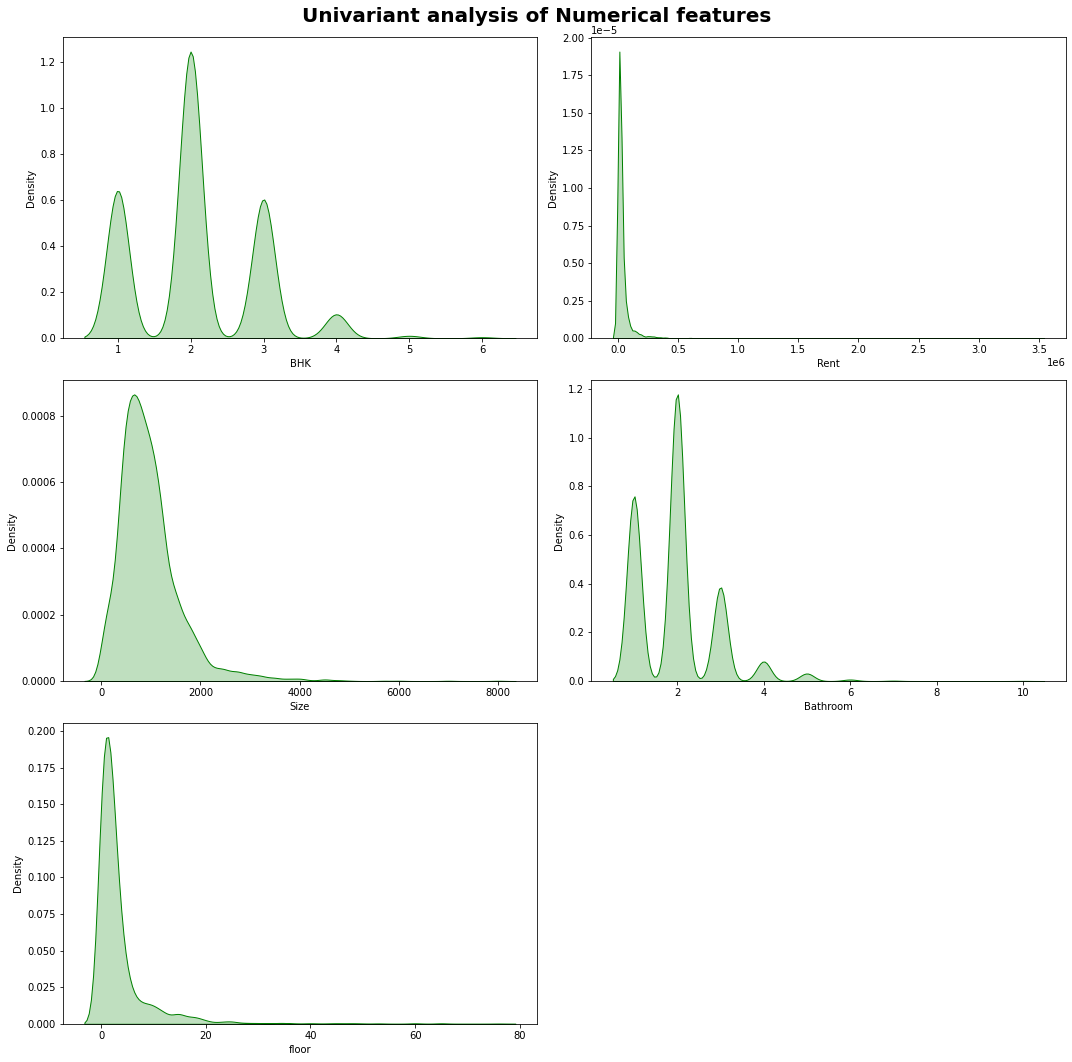

In [31]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
plt.figure(figsize = (15,15))
plt.suptitle('Univariant analysis of Numerical features', fontsize = 20, fontweight = 'bold')

for i in range(0, len(numeric_features)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x = data[numeric_features[i]], shade = True, color = 'g')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

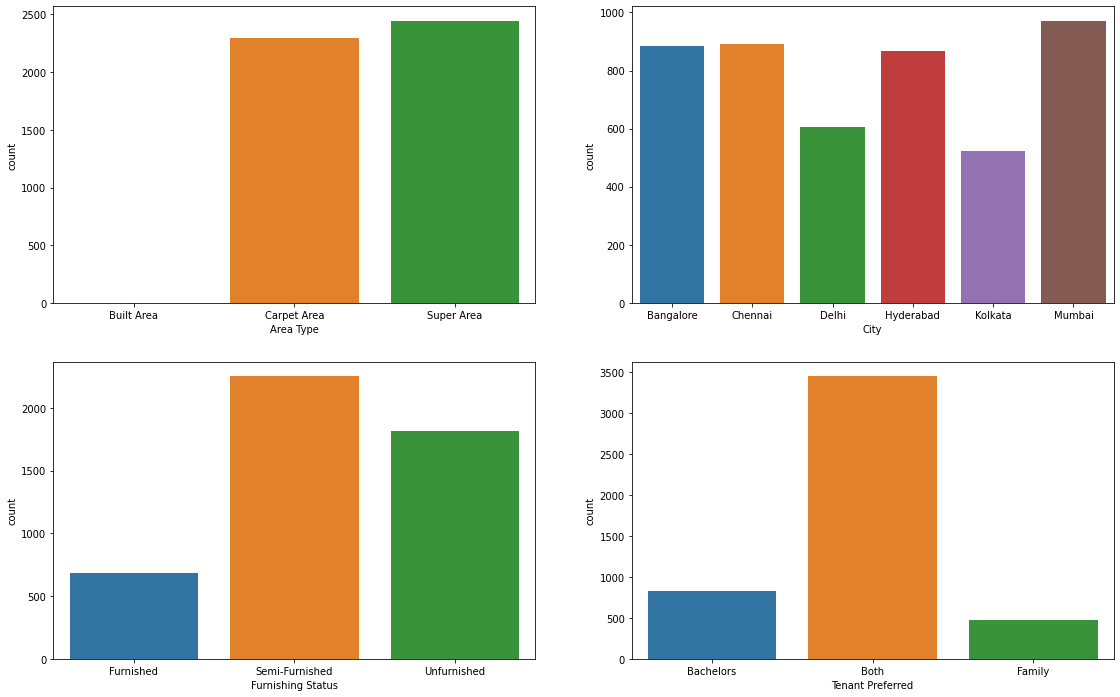

In [32]:
i = 1
plt.figure(figsize=(19, 12))
for c in cat_cols.columns:
    plt.subplot(2, 2, i)
    sns.countplot(x=data[c].sort_values())
    i+=1

## Bi-variant Analysis

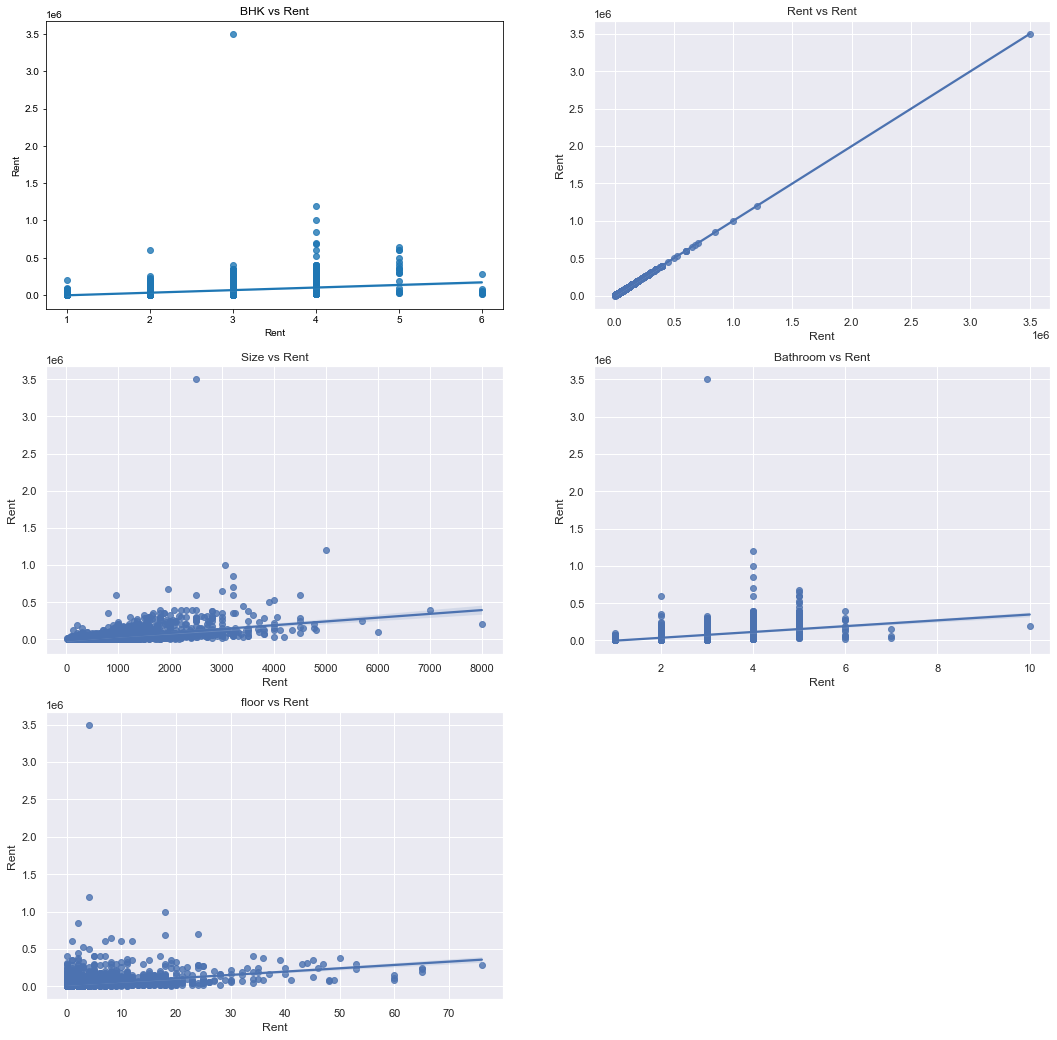

In [33]:
plt.figure(figsize = (18,18))
for i in enumerate(num_cols):
    plt.subplot(3,2,i[0]+1)
    sns.set(rc = {'figure.figsize':(8,10)})
    sns.regplot(data = data,x =  i[1], y = 'Rent')
    plt.xlabel('Rent')
    plt.title('{} vs Rent'.format(i[1], fontsize = 20))

## Multi-variant Analysis

<Figure size 1440x1440 with 0 Axes>

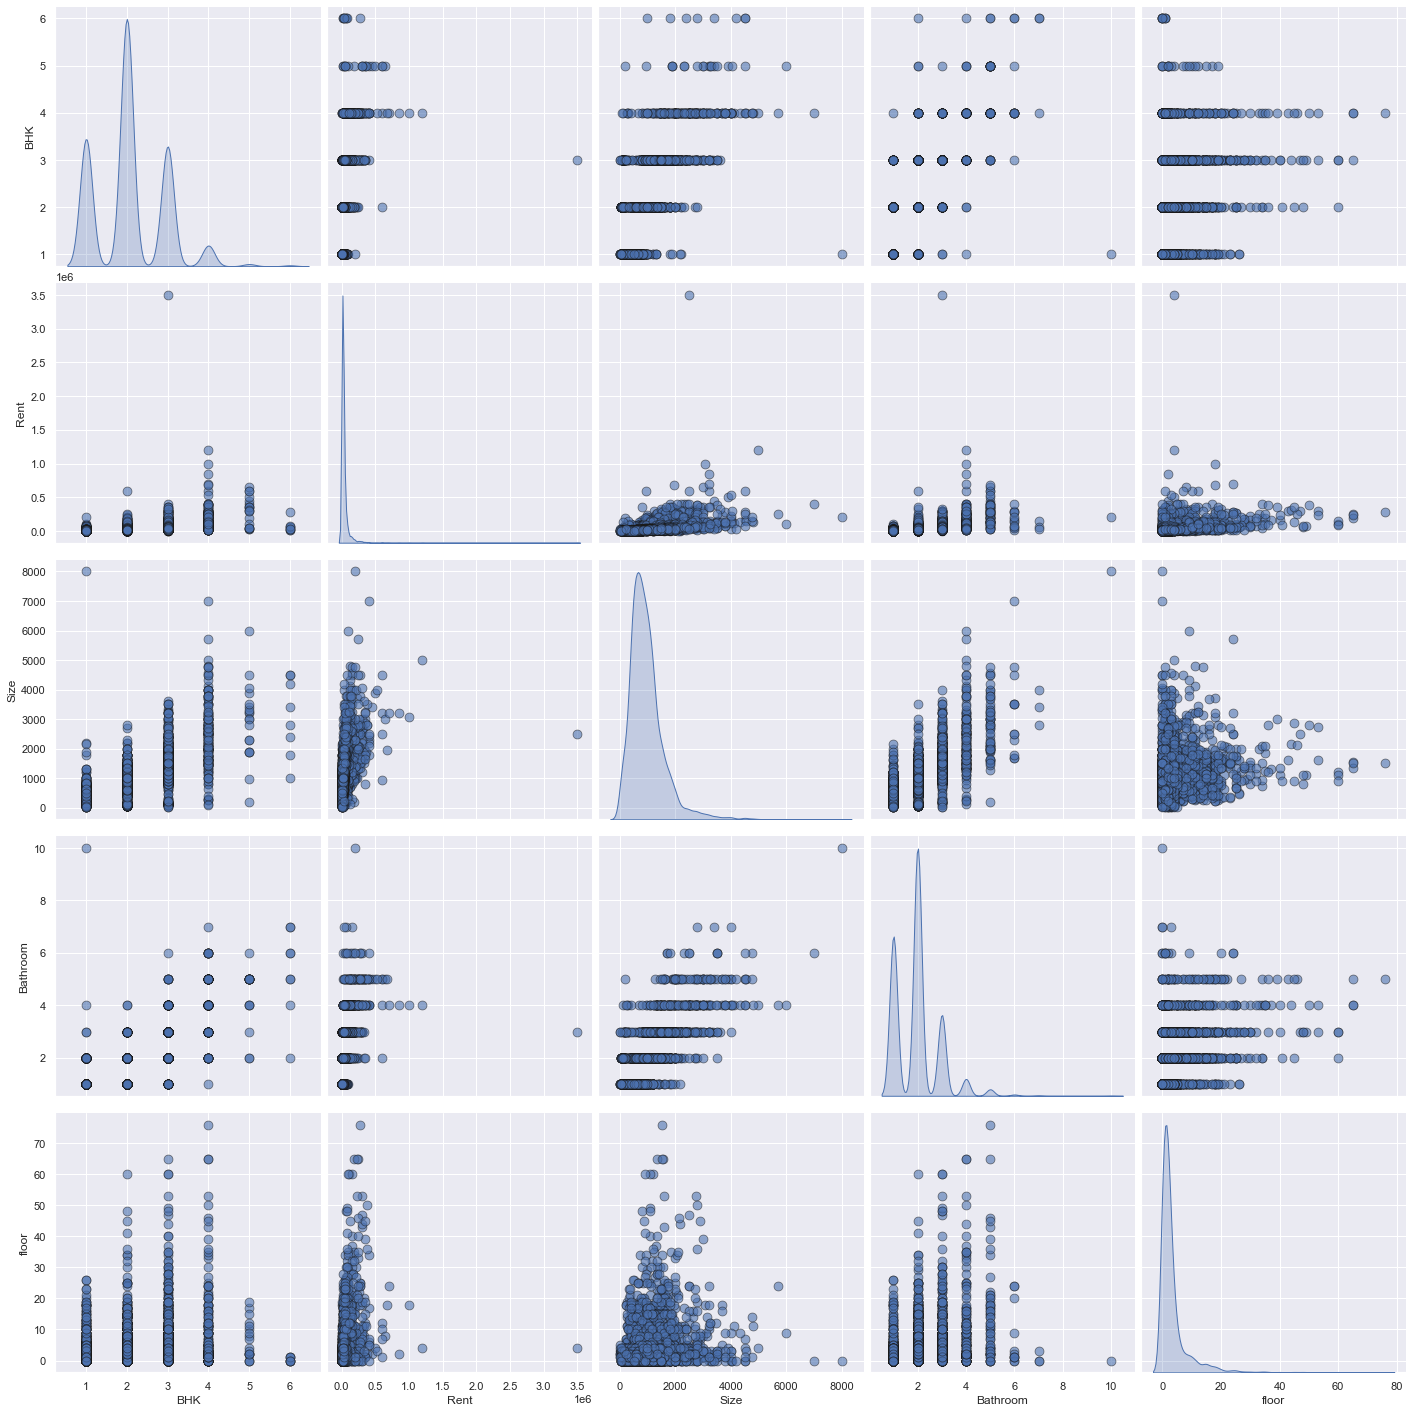

In [34]:
plt.figure(figsize = (20,20))
plt.suptitle('Multi variate analysis', fontsize = 20, fontweight = 'bold', alpha = 0.8)
sns.pairplot(data, diag_kind='kde',
            plot_kws = {'alpha': 0.6, 's':80, 'edgecolor':'k'},
            size = 4)

<AxesSubplot:>

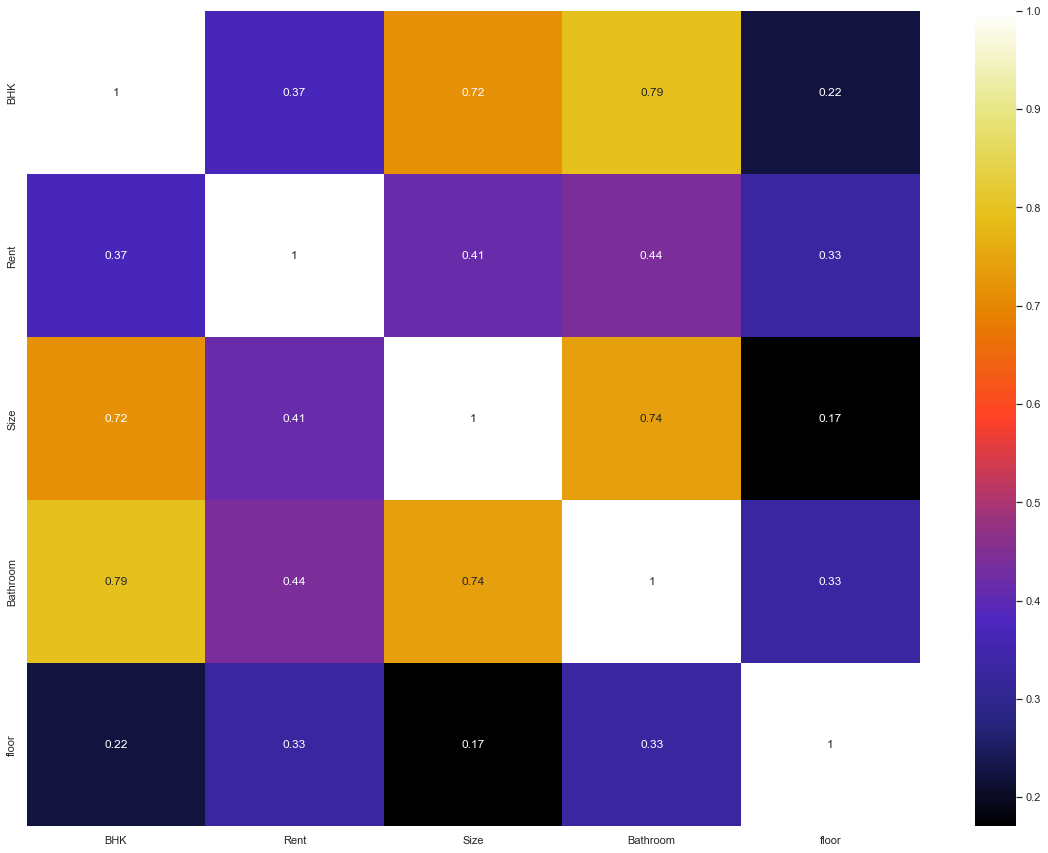

In [35]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), cmap = 'CMRmap', annot = True)

## Outliers Detection

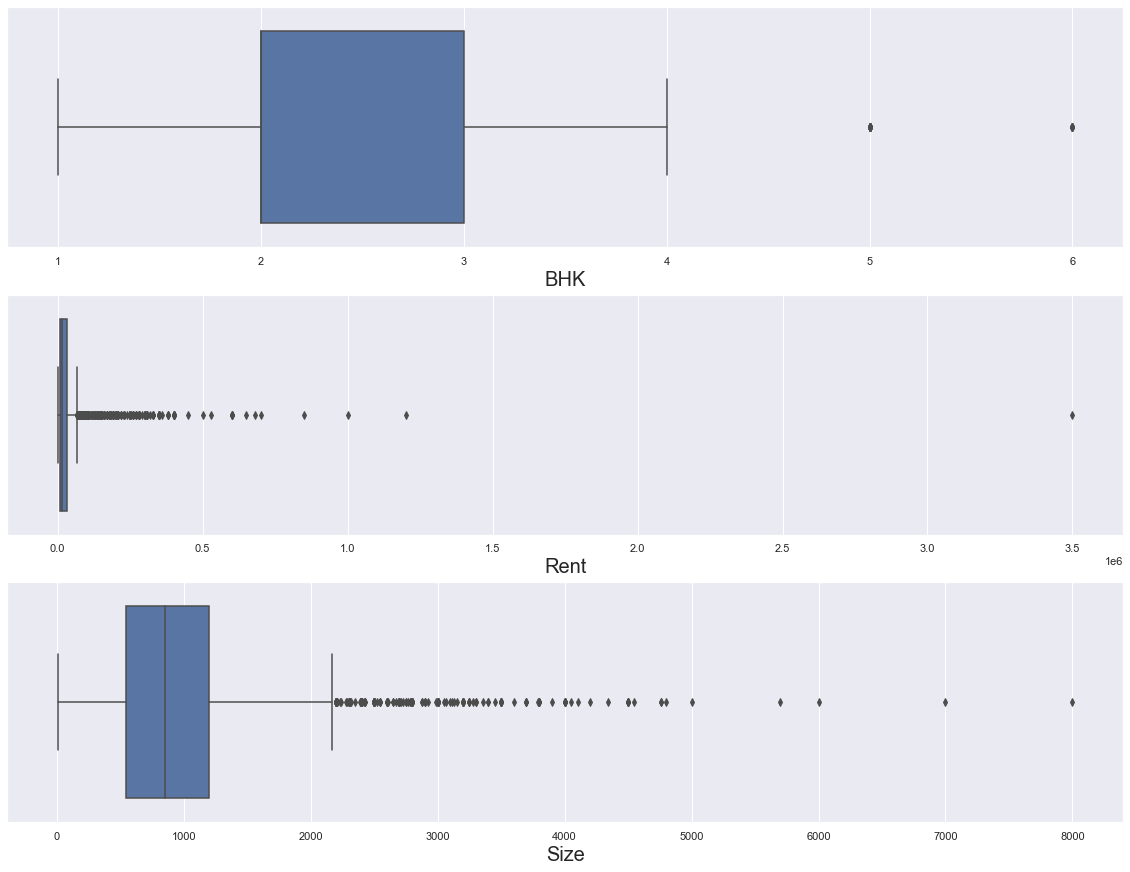

In [36]:
plt.figure(figsize = (20,15), facecolor ='white')
plotnumber = 1

for column in data:
    if plotnumber <= 3:
        ax = plt.subplot(3, 1, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber += 1
plt.show()    

<AxesSubplot:xlabel='Bathroom'>

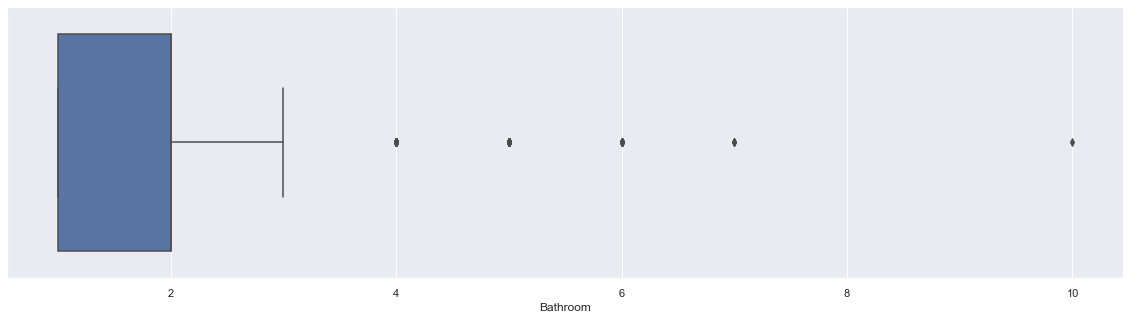

In [37]:
plt.figure(figsize = (20,5), facecolor ='white')
sns.boxplot(x = data['Bathroom'])

<AxesSubplot:xlabel='floor'>

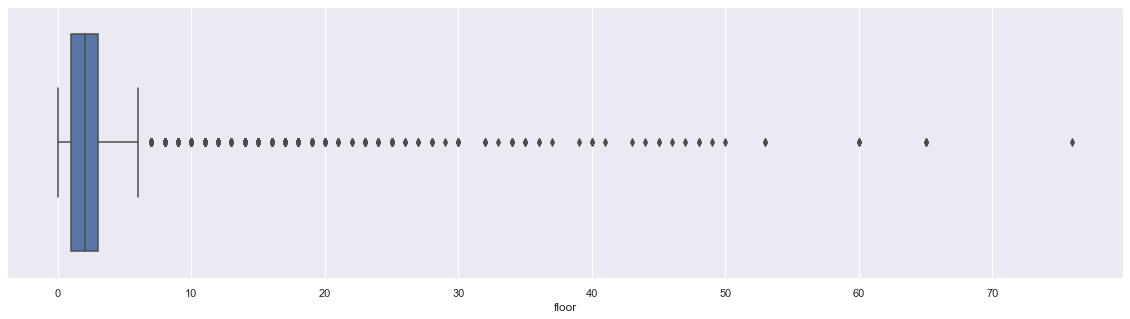

In [38]:
plt.figure(figsize = (20,5), facecolor ='white')
sns.boxplot(x = data['floor'])

## Removing Outliers

In [39]:
# dropping outliers
def outliers_imputation(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (IQR * 1.5)
    upper_fence = data[column].quantile(0.75) + (IQR * 1.5)
    print('IQR:', IQR)
    print(f'Lower Fence {column}:',lower_fence)
    print(f'Upper Fence {column}:',upper_fence)
    data.loc[data[column]  <= lower_fence,column] = lower_fence
    data.loc[data[column]  >= upper_fence,column] = upper_fence

In [40]:
columns = data.select_dtypes('number')

In [41]:
for col in columns:
    outliers_imputation(data, col)

IQR: 1.0
Lower Fence BHK: 0.5
Upper Fence BHK: 4.5
IQR: 23000.0
Lower Fence Rent: -24500.0
Upper Fence Rent: 67500.0
IQR: 650.0
Lower Fence Size: -425.0
Upper Fence Size: 2175.0
IQR: 1.0
Lower Fence Bathroom: -0.5
Upper Fence Bathroom: 3.5
IQR: 2.0
Lower Fence floor: -2.0
Upper Fence floor: 6.0


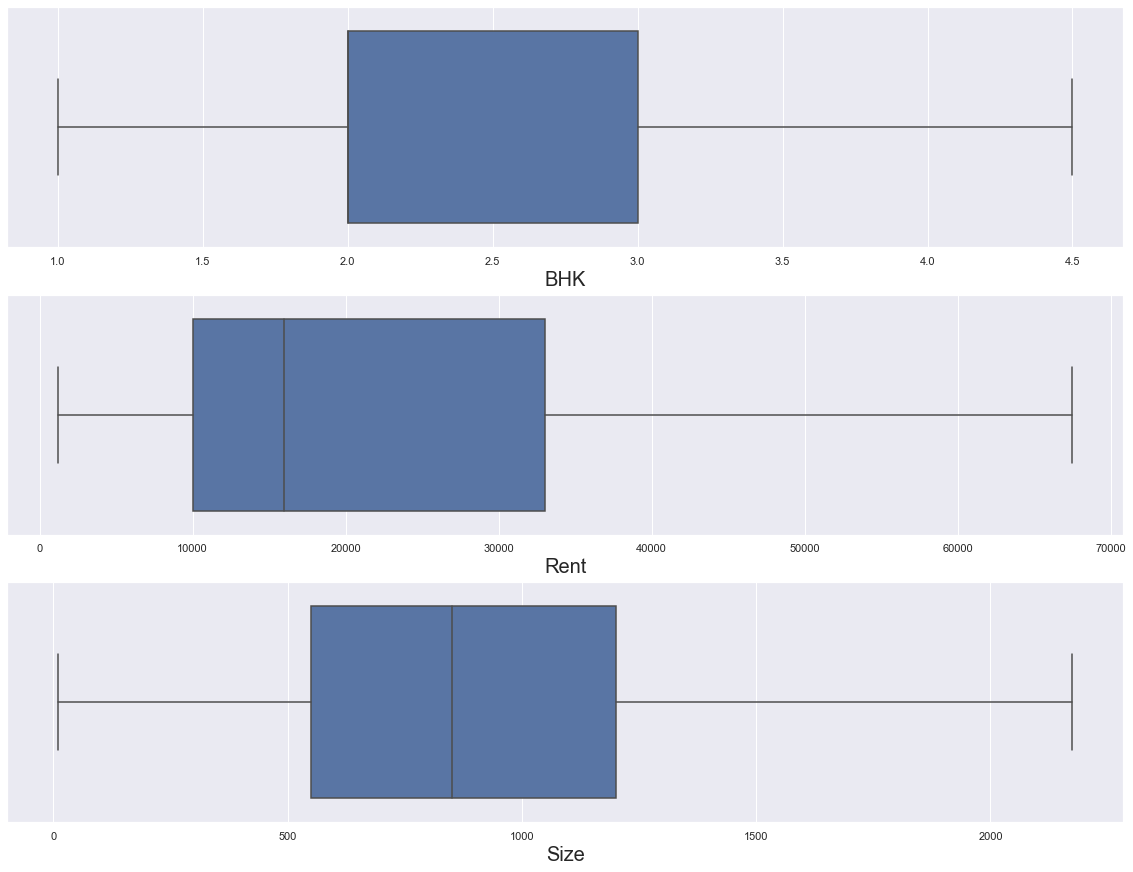

In [42]:
plt.figure(figsize = (20,15), facecolor ='white')
plotnumber = 1

for column in data:
    if plotnumber <= 3:
        ax = plt.subplot(3, 1, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber += 1
plt.show()   

<AxesSubplot:xlabel='Bathroom'>

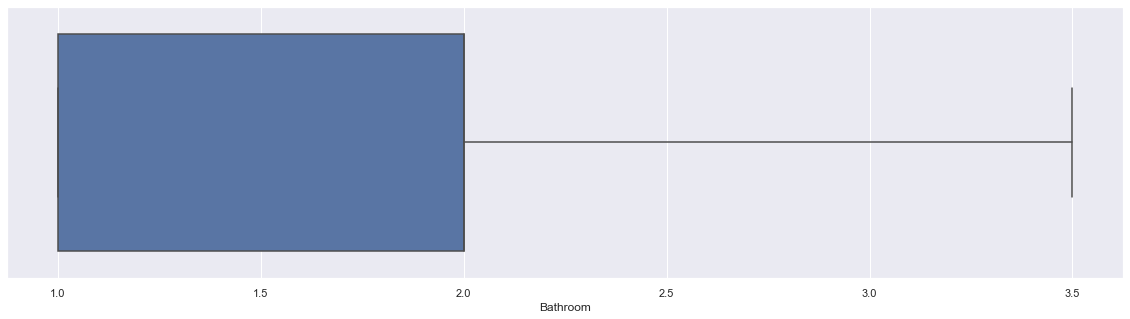

In [43]:
plt.figure(figsize = (20,5), facecolor ='white')
sns.boxplot(x = data['Bathroom'])

<AxesSubplot:xlabel='floor'>

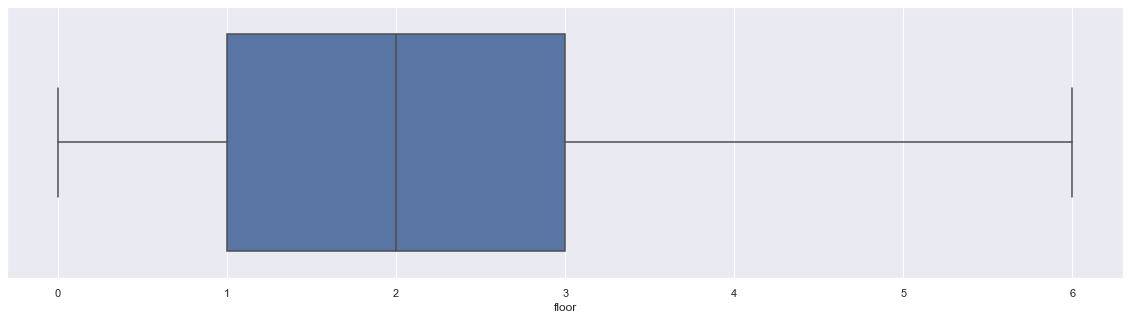

In [44]:
plt.figure(figsize = (20,5), facecolor ='white')
sns.boxplot(x = data['floor'])

In [45]:
data.to_csv('clean_data.csv')

## Feature Engineering

In [46]:
encoder = LabelEncoder()

In [47]:
column_transform = make_column_transformer((OneHotEncoder(sparse=False),
                                            ['area', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']), remainder='passthrough')

## Separating Dependent and Indepent Features

In [48]:
x = data.drop(columns = ['Rent'])
y = data['Rent']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [50]:
print(x_train.shape)
print(x_test.shape)

(3796, 9)
(950, 9)


## Model Building

### Linear Regression

In [51]:
scaler = StandardScaler()

In [52]:
lr = LinearRegression()

In [53]:
pipe = make_pipeline(column_transform, scaler, lr)

In [54]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [55]:
y_pred = pipe.predict(x_test)

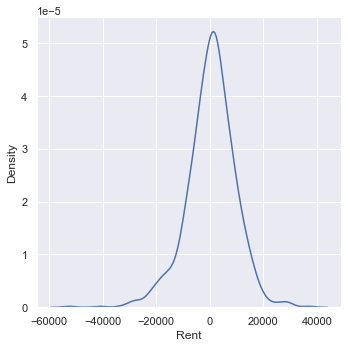

In [56]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of Linear Regression

Text(0, 0.5, 'Test Predicted data')

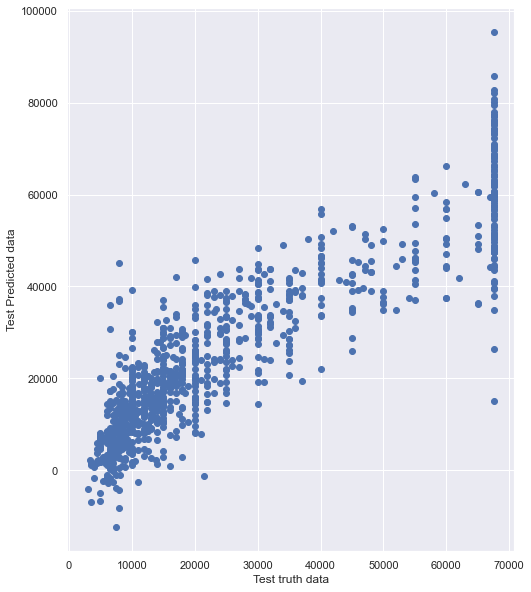

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [58]:
residual = y_test - y_pred

In [59]:
residual

1332    15175.596976
4345   -11616.403024
4495     3348.596976
2473    10259.596976
3883     8957.596976
            ...     
1692    -7998.403024
3707    -4024.403024
2944   -11628.403024
1722     1671.596976
4290    -8664.403024
Name: Rent, Length: 950, dtype: float64

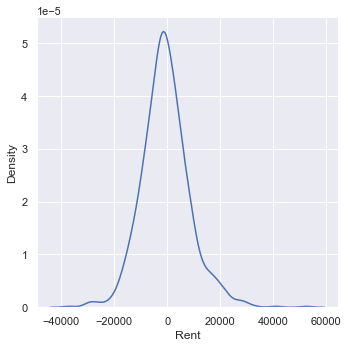

In [60]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

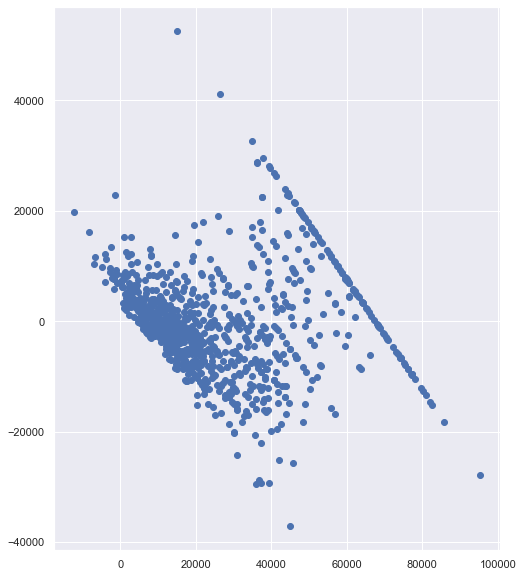

In [61]:
plt.scatter(y_pred, residual)

In [62]:
r2_score(y_test, y_pred)

0.7902605906607449

In [63]:
pipe.score(x_train, y_train)

0.8277372015936766

### Lasso Regression

In [64]:
ls = Lasso()

In [65]:
pipe = make_pipeline(column_transform, scaler, ls)

In [66]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [67]:
y_pred = pipe.predict(x_test)

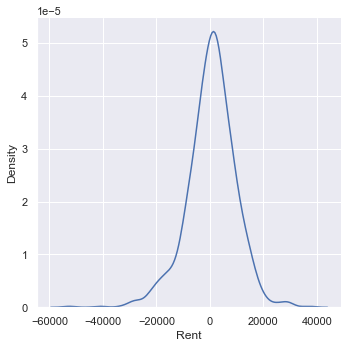

In [68]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of Lasso Regression

Text(0, 0.5, 'Test Predicted data')

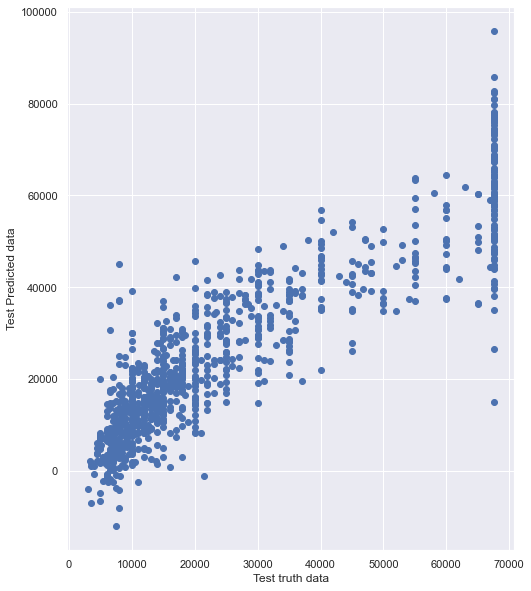

In [69]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [70]:
residual = y_test - y_pred

In [71]:
residual

1332    15242.190836
4345   -11562.029513
4495     3040.242302
2473    10504.381619
3883     8870.357928
            ...     
1692    -7941.945756
3707    -4130.267615
2944   -11554.816688
1722     1632.704162
4290    -8404.682050
Name: Rent, Length: 950, dtype: float64

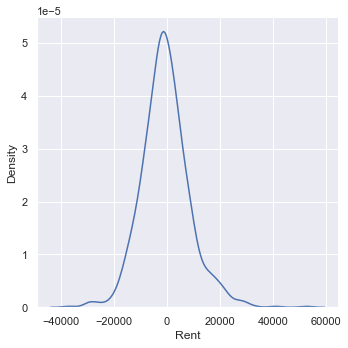

In [72]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

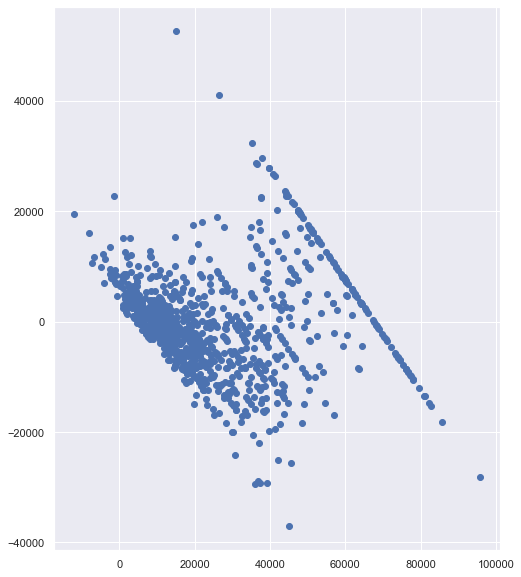

In [73]:
plt.scatter(y_pred, residual)

In [74]:
r2_score(y_test, y_pred)

0.7904207940806689

In [75]:
pipe.score(x_train, y_train)

0.8279403074503355

### Ridge Regression

In [76]:
Rd = Ridge()

In [77]:
pipe = make_pipeline(column_transform, scaler, Rd)

In [78]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [79]:
y_pred = pipe.predict(x_test)

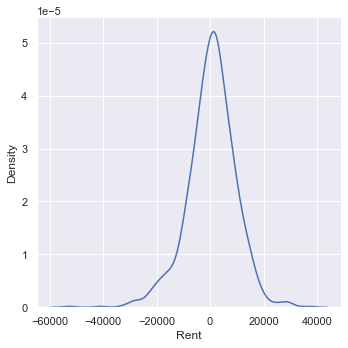

In [80]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption Ridge regression

Text(0, 0.5, 'Test Predicted data')

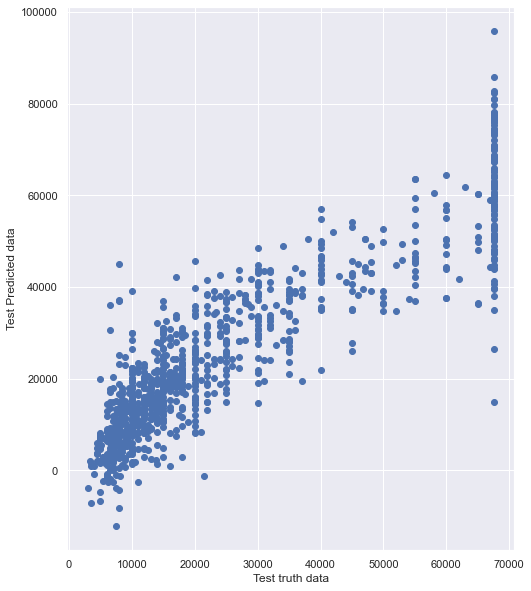

In [81]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [82]:
residual = y_test - y_pred

In [83]:
residual

1332    15249.643272
4345   -11575.279004
4495     3057.825400
2473    10525.789768
3883     8855.138469
            ...     
1692    -7954.955260
3707    -4136.255016
2944   -11548.072265
1722     1663.978905
4290    -8375.721573
Name: Rent, Length: 950, dtype: float64

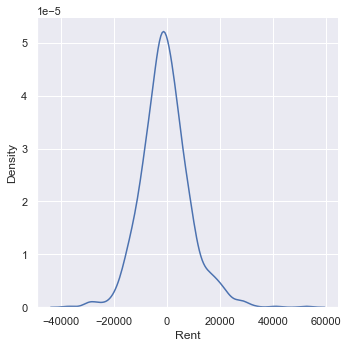

In [84]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

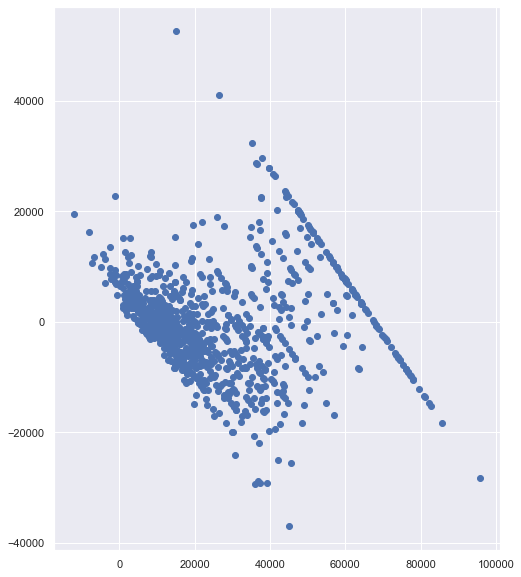

In [85]:
plt.scatter(y_pred, residual)

In [86]:
r2_score(y_test, y_pred)

0.7902594550774263

In [87]:
pipe.score(x_train, y_train)

0.8279414704349624

### ElasticNET Regression

In [88]:
els = ElasticNet()

In [89]:
pipe = make_pipeline(column_transform, scaler, els)

In [90]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [91]:
y_pred = pipe.predict(x_test)

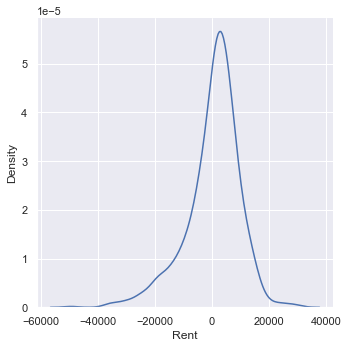

In [92]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of ElasticNet Regression

Text(0, 0.5, 'Test Predicted data')

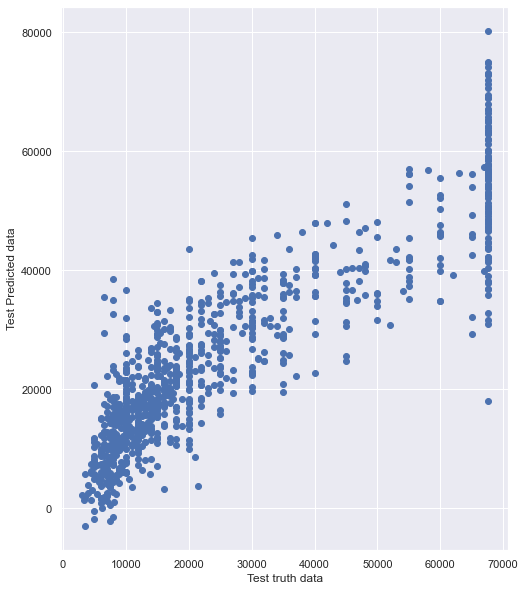

In [93]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [94]:
residual = y_test - y_pred

In [95]:
residual

1332    18409.002022
4345   -10930.290923
4495     -647.024213
2473     4915.129914
3883    12106.536958
            ...     
1692    -8992.402384
3707    -4142.043966
2944   -12221.674077
1722    -1384.951821
4290   -11048.078666
Name: Rent, Length: 950, dtype: float64

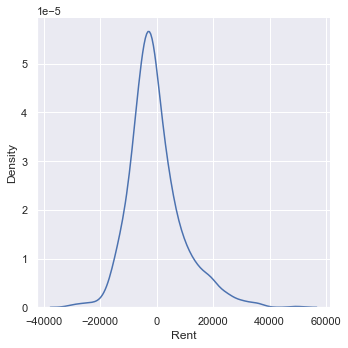

In [96]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

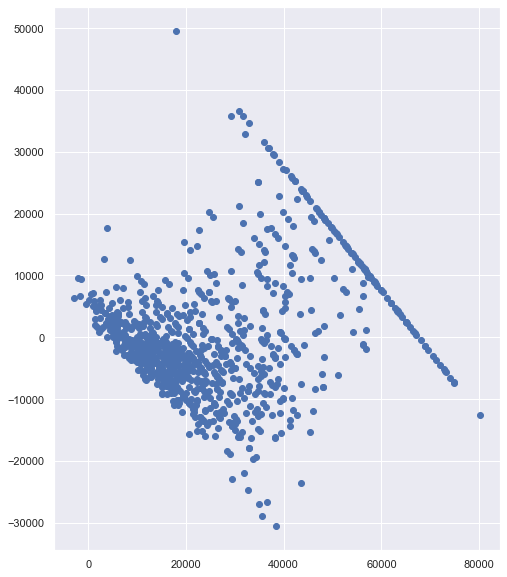

In [97]:
plt.scatter(y_pred, residual)

In [98]:
r2_score(y_test, y_pred)

0.7740357002912952

In [99]:
pipe.score(x_train, y_train)

0.7939009322014349

### Random Forest Regression

In [100]:
rr = RandomForestRegressor()

In [101]:
pipe = make_pipeline(column_transform, scaler, rr)

In [102]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [103]:
y_pred = pipe.predict(x_test)

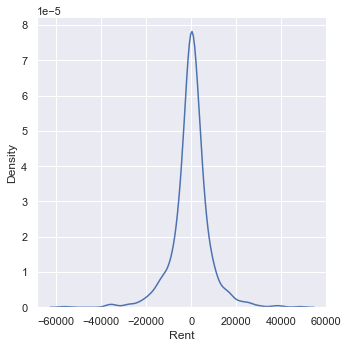

In [104]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of Random Forest Regressor

Text(0, 0.5, 'Test Predicted data')

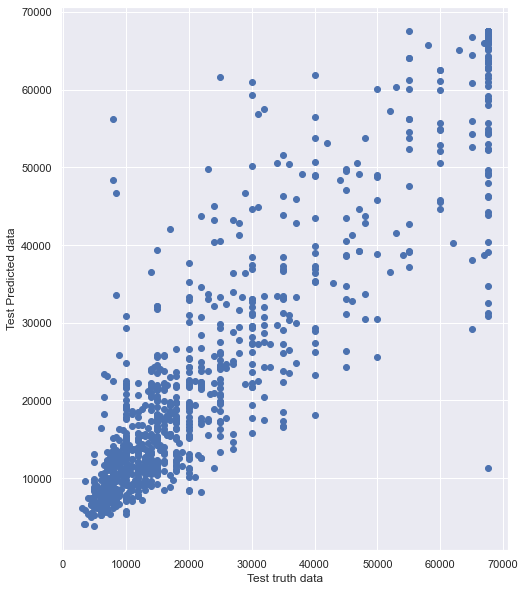

In [105]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [106]:
residual = y_test - y_pred

In [107]:
residual

1332    19500.056667
4345    -3123.000000
4495      872.500000
2473     3702.333333
3883    17532.619048
            ...     
1692     -428.000000
3707    -5074.990000
2944   -10047.303333
1722    -1858.000000
4290    -4795.000000
Name: Rent, Length: 950, dtype: float64

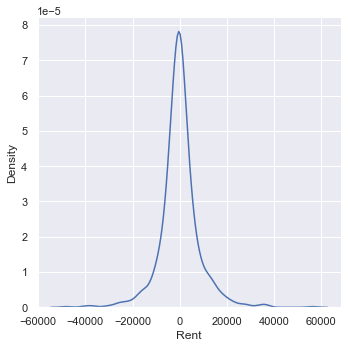

In [108]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

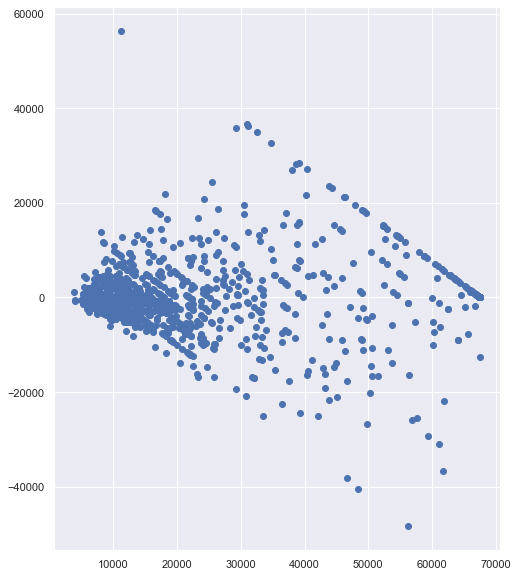

In [109]:
plt.scatter(y_pred, residual)

In [110]:
r2_score(y_test, y_pred)

0.8232305982359541

In [111]:
pipe.score(x_train, y_train)

0.9717607712152264

### Decision Tree Regression

In [112]:
dt = DecisionTreeRegressor()

In [113]:
pipe = make_pipeline(column_transform, scaler, dt)

In [114]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [115]:
y_pred = pipe.predict(x_test)

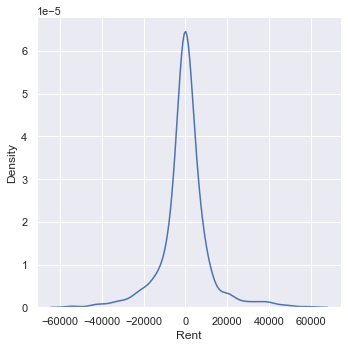

In [116]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of Decision Tree Regressor

Text(0, 0.5, 'Test Predicted data')

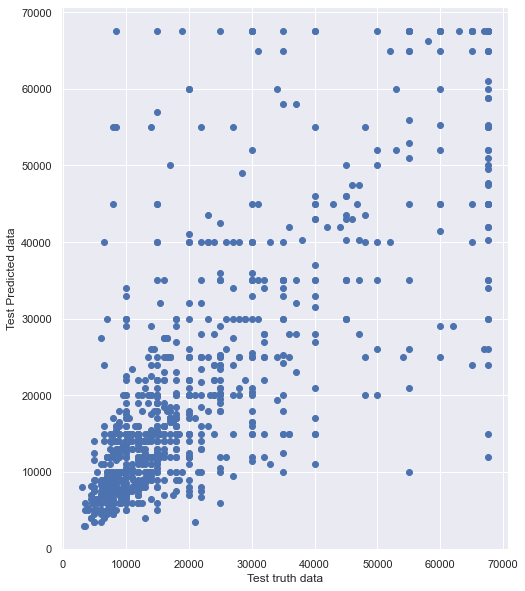

In [117]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [118]:
residual = y_test - y_pred

In [119]:
residual

1332    30000.0
4345    -4000.0
4495        0.0
2473     5000.0
3883    28000.0
         ...   
1692     2000.0
3707     4000.0
2944    -6000.0
1722    -4000.0
4290    -5000.0
Name: Rent, Length: 950, dtype: float64

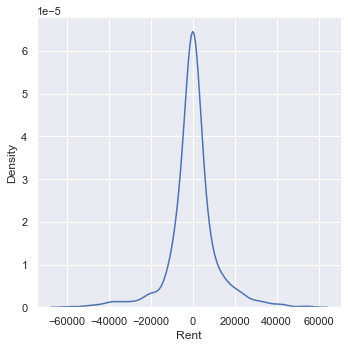

In [120]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

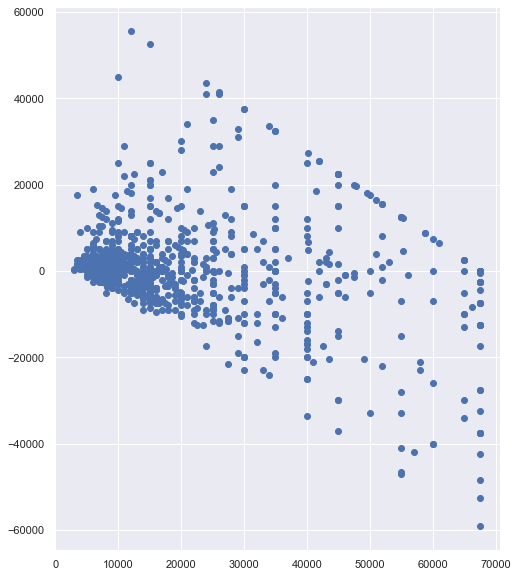

In [121]:
plt.scatter(y_pred, residual)

In [122]:
r2_score(y_test, y_pred)

0.6717612377724156

In [123]:
pipe.score(x_train, y_train)

0.9956320211274812

### XGBOOST Regression

In [124]:
xg = XGBRegressor()

In [125]:
pipe_xg = make_pipeline(column_transform, scaler, xg)

In [126]:
pipe_xg.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_by...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                   

In [127]:
y_pred = pipe_xg.predict(x_test)

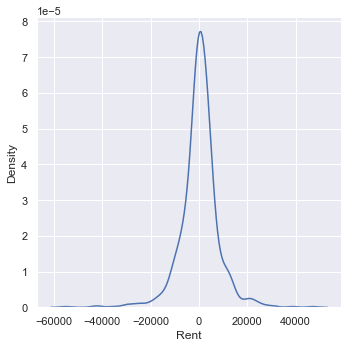

In [128]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of XGBoost Regressor

Text(0, 0.5, 'Test Predicted data')

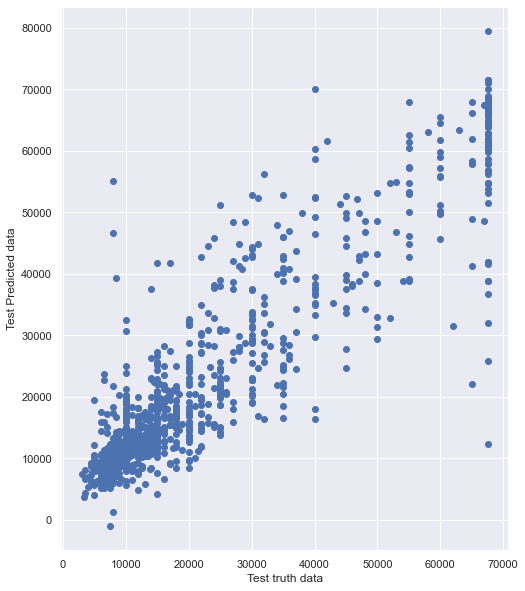

In [129]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [130]:
residual = y_test - y_pred

In [131]:
residual

1332    18565.458984
4345    -2709.833984
4495     -275.389648
2473     7179.080078
3883    13650.828125
            ...     
1692    -5229.138672
3707      -93.296875
2944    -8870.917969
1722    -1584.706055
4290    -6107.119141
Name: Rent, Length: 950, dtype: float64

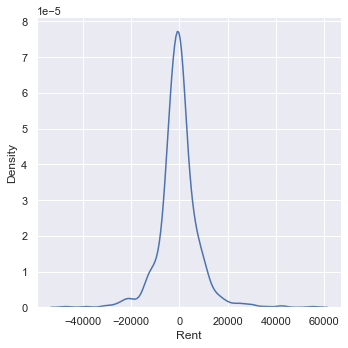

In [132]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

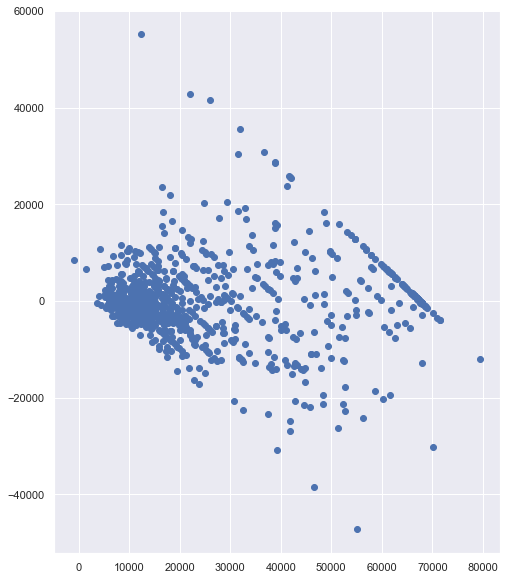

In [133]:
plt.scatter(y_pred, residual)

In [134]:
r2_score(y_test, y_pred)

0.8390544765085698

In [135]:
pipe_xg.score(x_train, y_train)

0.9181058351683948

### Gradient Boosting Regression

In [136]:
gb = GradientBoostingRegressor()

In [137]:
pipe = make_pipeline(column_transform, scaler, gb)

In [138]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [139]:
y_pred = pipe.predict(x_test)

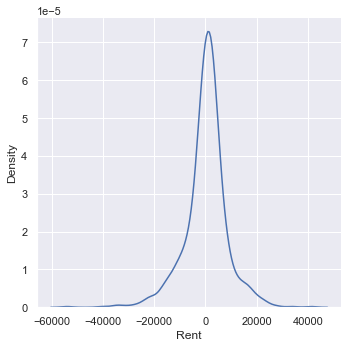

In [140]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption Gradient Boosting Regressor

Text(0, 0.5, 'Test Predicted data')

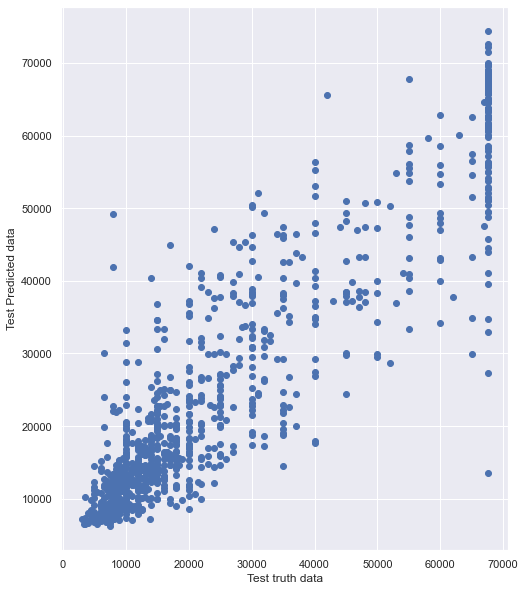

In [141]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [142]:
residual = y_test - y_pred

In [143]:
residual

1332    20029.997031
4345    -1944.873349
4495     -612.386820
2473      934.117423
3883    10982.215526
            ...     
1692    -1491.190856
3707    -1529.881573
2944    -6717.072959
1722    -1845.226943
4290    -6381.384206
Name: Rent, Length: 950, dtype: float64

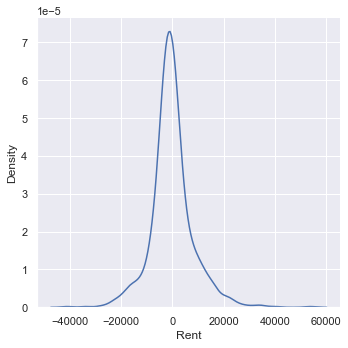

In [144]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

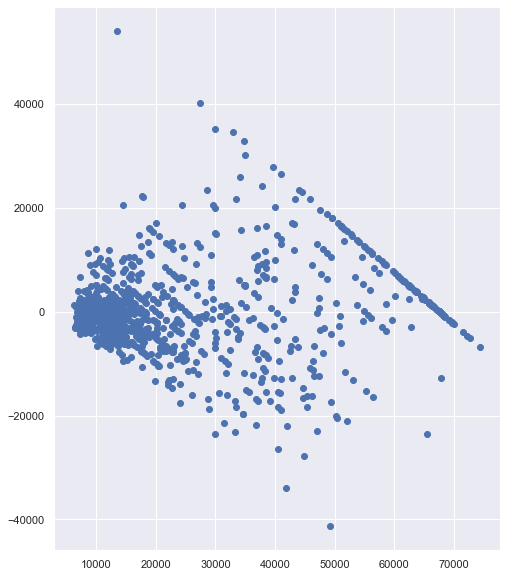

In [145]:
plt.scatter(y_pred, residual)

In [146]:
r2_score(y_test, y_pred)

0.8239843184641609

In [147]:
pipe.score(x_train, y_train)

0.8523870632858757

### Ada Boost Regression

In [148]:
ada = AdaBoostRegressor()

In [149]:
pipe = make_pipeline(column_transform, scaler, ada)

In [150]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('standardscaler', StandardScaler()),
                ('adaboostregressor', AdaBoostRegressor())])

In [151]:
y_pred = pipe.predict(x_test)

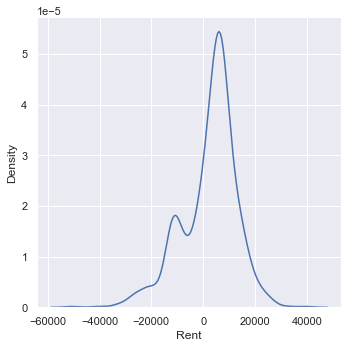

In [152]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of Ada Boost Regressor

Text(0, 0.5, 'Test Predicted data')

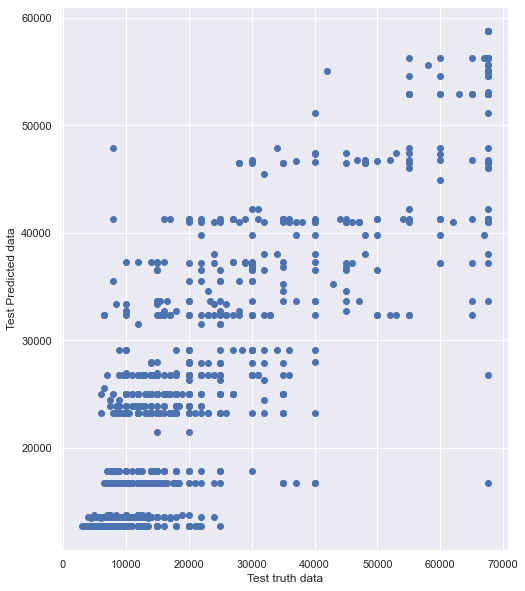

In [153]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [154]:
residual = y_test - y_pred

In [155]:
residual

1332    17663.074766
4345   -10040.056962
4495    -5804.433016
2473     -555.847390
3883     8172.222222
            ...     
1692    -4787.525907
3707    -8923.117593
2944   -12787.525907
1722    -6746.612971
4290   -13849.677419
Name: Rent, Length: 950, dtype: float64

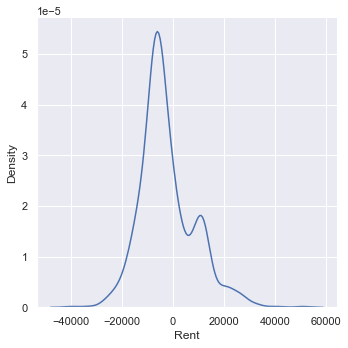

In [156]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

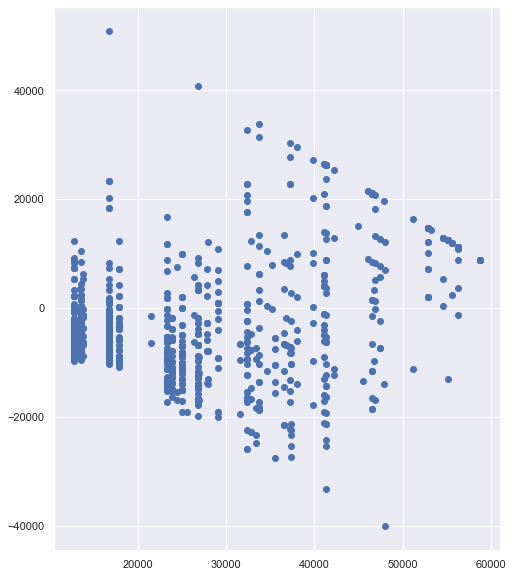

In [157]:
plt.scatter(y_pred, residual)

In [158]:
r2_score(y_test, y_pred)

0.7042316866563931

In [159]:
pipe.score(x_train, y_train)

0.7164422628113188

#### Xg Boost is Best Model so for with R2 Score of 84%

In [160]:
# Dumping Model
import pickle

In [161]:
pickle.dump(pipe_xg, open('XgboostModel.pkl', 'wb'))